In [1]:
import xmltodict
import json
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import pie, axis, show
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
import math
from collections import defaultdict


## Loading Post file

In [3]:
lines = []
with open('./ansh/Posts.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_post = pd.DataFrame(lines)
df_post.head()

Id PostTypeId ParentId             CreationDate Score  \
0   538          2      535  2008-08-02T18:56:56.460    28   
1   766          1      NaN  2008-08-03T17:44:07.450    35   
2  1484          2     1476  2008-08-04T18:34:45.520    72   
3  1983          1      NaN  2008-08-05T07:18:55.853    50   
4  3061          1      NaN  2008-08-06T03:36:08.627  1655   

                                                Body OwnerUserId  \
0  <p>One possibility is Hudson.  It's written in...         156   
1  <p>I can get Python to work with Postgresql bu...     1384652   
2  <pre><code>&gt;&gt;&gt; print int('01010101111...     2089740   
3  <p>In many places, <code>(1,2,3)</code> (a tup...         116   
4  <p>What is the best way to go about calling a ...         121   

  LastEditorDisplayName             LastEditDate         LastActivityDate  \
0           user1873471  2013-01-28T03:54:17.217  2013-01-28T03:54:17.217   
1                   NaN  2012-05-31T16:57:58.230  2019-10-12T05:19:46.087   
2               lbrandy  2012-01-22T17:47:30.370  2012-01-22T17:47:30.370   
3         Mark Harrison  2019-05-02T20:34:39.577  2019-05-02T20:34:39.577   
4                   NaN  2019-01-23T15:03:25.240  2019-10-09T20:24:23.813   

   ... AcceptedAnswerId ViewCount LastEditorUserId  \
0  ...              NaN       NaN              NaN   
1  ...             1619      3200           487855   
2  ...              NaN       NaN            86622   
3  ...             2277      4589         10221765   
4  ...             3071    664829            11575   

                                               Title  \
0                                                NaN   
1                                   Python and MySQL   
2                                                NaN   
3  Python: what is the difference between (1,2,3)...   
4  Calling a function of a module by using its na...   

                                  Tags AnswerCount FavoriteCount  \
0                                  NaN         NaN           NaN   
1  <python><mysql><postgresql><bpgsql>           6             3   
2                                  NaN         NaN           NaN   
3               <python><list><tuples>          15             6   
4                     <python><object>          12           455   

  CommunityOwnedDate OwnerDisplayName ClosedDate  
0                NaN              NaN        NaN  
1                NaN              NaN        NaN  
2                NaN              NaN        NaN  
3                NaN              NaN        NaN  
4                NaN              NaN        NaN  

[5 rows x 21 columns]

## Loading Tags file

In [4]:
lines = []
with open('./ansh/Tags.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_tags = pd.DataFrame(lines)
df_tags.head()

Id     TagName    Count ExcerptPostId WikiPostId
0  1        .net   293379       3624959    3607476
1  2        html   970699       3673183    3673182
2  3  javascript  1955557       3624960    3607052
3  4         css   649436       3644670    3644669
4  5         php  1335050       3624936    3607050

## Loading Users file

In [5]:
lines = []
with open('./ansh/Users.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_user = pd.DataFrame(lines)
df_user.head()

Id Reputation             CreationDate            DisplayName  \
0   1      58679  2008-07-31T14:22:31.287            Jeff Atwood   
1   4      31720  2008-07-31T14:22:31.317           Joel Spolsky   
2  13     194621  2008-08-01T04:18:04.943     Chris Jester-Young   
3  17      50531  2008-08-01T12:02:21.617           Nick Berardi   
4  25      31334  2008-08-01T12:15:23.243  CodingWithoutComments   

            LastAccessDate                         WebsiteUrl  \
0  2020-02-26T23:04:34.223  http://www.codinghorror.com/blog/   
1  2020-02-29T18:22:56.427        https://joelonsoftware.com/   
2  2019-12-03T01:13:11.627               http://about.cky.nz/   
3  2020-02-28T14:38:17.133             http://nickberardi.com   
4  2018-05-03T20:41:05.130                                      

                            Location  \
0                     El Cerrito, CA   
1                       New York, NY   
2                   Raleigh, NC, USA   
3                       Issaquah, WA   
4  Seattle, Washington United States   

                                             AboutMe   Views UpVotes  \
0  <p><a href="http://www.codinghorror.com/blog/a...  532726    3378   
1  <p>In 2000 I co-founded Fog Creek Software, wh...   77635     814   
2  <p>I use they/them to refer to myself in the t...   39977    5206   
3  <p>In my spare time when not working as a soft...    5155     885   
4            <p>a man, a plan, a canal, panama</p>\n    4246     539   

  DownVotes                                    ProfileImageUrl AccountId  
0      1311  https://www.gravatar.com/avatar/51d623f33f8b83...         1  
1        96      https://i.stack.imgur.com/C5gBG.jpg?s=128&g=1         4  
2       210      https://i.stack.imgur.com/1XtZi.jpg?s=128&g=1         9  
3       216                                                NaN        12  
4        83                                                NaN        18

## Loading Votes file

In [7]:
lines = []
with open('./ansh/Votes.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_votes = pd.DataFrame(lines)
df_votes.head()

Id PostId VoteTypeId             CreationDate UserId BountyAmount
0   2613    972          2  2008-08-04T00:00:00.000    NaN          NaN
1   5292   1829          2  2008-08-05T00:00:00.000    NaN          NaN
2   7197   2982          2  2008-08-06T00:00:00.000    NaN          NaN
3   8354   3117          2  2008-08-06T00:00:00.000    NaN          NaN
4  10940   5102          2  2008-08-07T00:00:00.000    NaN          NaN

## Loading Badges File

In [9]:
lines = []
with open('./ansh/Badges.json') as file: 
    for line in file:
        lines.append(json.loads(line))
df_badges = pd.DataFrame(lines)
df_badges.head()

Id UserId     Name                     Date Class TagBased
0  83047   2846  Teacher  2008-09-15T08:55:03.957     3    False
1  83333   2958  Teacher  2008-09-15T08:55:03.957     3    False
2  83430   2354  Teacher  2008-09-15T08:55:03.957     3    False
3  83509     13  Teacher  2008-09-15T08:55:03.970     3    False
4  83609   3149  Teacher  2008-09-15T08:55:03.970     3    False

## Badges WordCloud

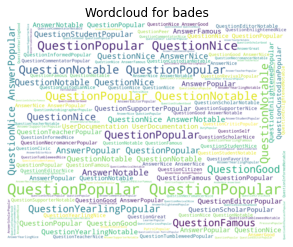

In [15]:
names = ""
for name in df_badges['Name']:
    names = names + name
wordcloud = WordCloud(
    width=1800, 
    height=1400, 
    max_font_size=300,
    max_words=150,
    background_color='white').generate(names)

plt.figure()
plt.title("Wordcloud for bades")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
tags_arr = df_post['Tags']

### Cleaning Tags and making a frequency array for the same

In [21]:
d = defaultdict(int)

for tag in tags_arr:
    if type(tag) != str:
        continue
    s = ""
    for c in tag:
        if c == '<':
            continue
        if c == '>':
            d[s] = d[s] + 1
            s = ""
            continue
        s = s + c  
l = []
for key,val in d.items():
    l.append((key, val))

In [22]:

def Sort_Tuple(tup):  
    lst = len(tup)  
    for i in range(0, lst):  
          
        for j in range(0, lst-i-1):  
            if (tup[j][1] < tup[j + 1][1]):  
                temp = tup[j]  
                tup[j]= tup[j + 1]  
                tup[j + 1]= temp  
    return tup  
          
print(Sort_Tuple(l))  

[('python', 104506), ('python-3.x', 9593), ('pandas', 9129), ('django', 8438), ('numpy', 4769), ('python-2.7', 4737), ('list', 3403), ('matplotlib', 2905), ('dataframe', 2607), ('dictionary', 2342), ('tensorflow', 2130), ('regex', 2107), ('tkinter', 1947), ('flask', 1919), ('csv', 1736), ('string', 1701), ('arrays', 1597), ('json', 1467), ('selenium', 1356), ('html', 1265), ('opencv', 1247), ('beautifulsoup', 1242), ('machine-learning', 1182), ('web-scraping', 1072), ('keras', 1062), ('scikit-learn', 1034), ('mysql', 1024), ('scipy', 1022), ('sqlalchemy', 972), ('multithreading', 916), ('javascript', 901), ('linux', 887), ('google-app-engine', 882), ('loops', 846), ('function', 844), ('pygame', 839), ('pip', 832), ('pyqt', 831), ('datetime', 813), ('windows', 807), ('django-models', 792), ('class', 772), ('python-requests', 735), ('scrapy', 732), ('for-loop', 709), ('file', 708), ('xml', 695), ('c++', 683), ('algorithm', 649), ('macos', 620), ('sqlite', 616), ('postgresql', 612), ('soc

In [23]:
tag_array_all, count_array_all = zip(*l)
tag_array = tag_array_all[:10]
count_array = count_array_all[:10]
print(tag_array, count_array)


('python', 'python-3.x', 'pandas', 'django', 'numpy', 'python-2.7', 'list', 'matplotlib', 'dataframe', 'dictionary') (104506, 9593, 9129, 8438, 4769, 4737, 3403, 2905, 2607, 2342)


## Top 10 tags

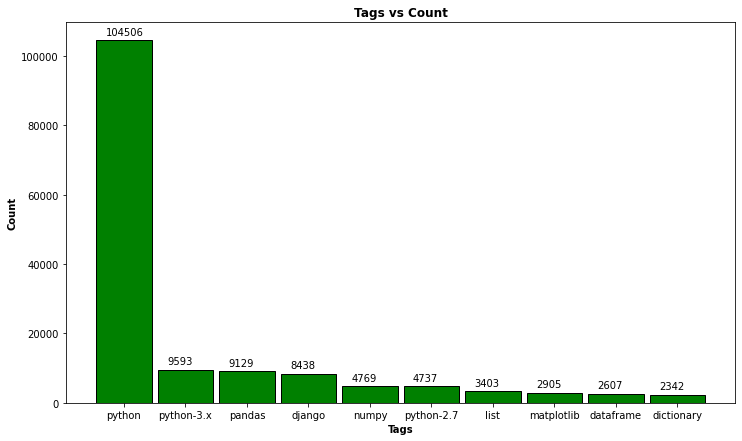

In [26]:
plt.figure(figsize = (12,7))
plt.bar(tag_array, count_array, width= 0.9, align='center',color='green', edgecolor = 'black')

# Annotating the bar plot with the values (total death count)
for i in range(len(tag_array)):
    plt.annotate(count_array[i], (-0.3 + i, count_array[i] + 1500))

plt.title("Tags vs Count",fontweight="bold")
plt.xlabel('Tags',fontweight="bold")
plt.ylabel('Count',fontweight="bold")
plt.show()

## Word Cloud for Tags

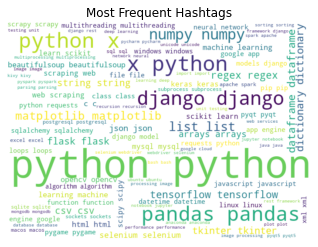

In [27]:
tags_list = ""
for tag, count in zip(tag_array_all, count_array_all):
    while count > 0:
        tags_list = tags_list + " " + tag
        count = count - 1
wordcloud = WordCloud(
    width=700, 
    height=500, 
    max_font_size=100,
    max_words=100,
    background_color='white').generate(tags_list)

plt.figure()
plt.title("Hashtags")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Common Sampling for Posts is done through python tag

In [20]:
for tag in tags_arr:
    if type(tag) == str:
        print(tag)

<python><mysql><postgresql><bpgsql>
<python><list><tuples>
<python><object>
<python><doctest>
<python><command-line><packaging>
<python><command-line><command-line-arguments>
<python><http><urllib>
<python><binary><io><buffer>
<python><security>
<python><windows><cross-platform>
<python><multithreading>
<python><class-method>
<javascript><python>
<python><favicon>
<python><gtk><pygtk><glade><gtk2>
<python><svn><dos2unix>
<python><sysadmin><whois>
<python><weak-references>
<python><path><relative-path><absolute-path>
<python>
<python><xml><xhtml>
<python><linux><firefox><ubuntu><automation>
<python><sql><database><sqlalchemy>
<python><dictionary><attributes><object><metaprogramming>
<python><django>
<python><macos><libxml2>
<python><django><model-view-controller><model>
<python><windows><cluster-computing><pywin32>
<python><django><frameworks>
<python><bash><redirect><diff><vimdiff>
<python><user-interface><api>
<python><loops><range><python-2.x><xrange>
<python><console><stdout>
<pytho

<python><random>
<java><python><video-streaming><twisted><chat>
<python><list>
<python><.net><nlp>
<python><django><google-app-engine>
<c++><python><compiler-construction><code-generation>
<python><numpy><cython>
<python><django><google-app-engine><fixtures><django-fixtures>
<python><colors><python-imaging-library><color-space><color-profile>
<java><python><xml><xsd>
<python><openssl><ssl-certificate>
<python><syntax><logic>
<python><vim><exuberant-ctags>
<python><ubuntu><curl><pycurl>
<python><eclipse><pydev>
<python><installer><yum>
<python><apache><mod-wsgi><web.py>
<javascript><jquery><python><c><syntax>
<python>
<python><django>
<python><cross-platform><directory>
<python><macos>
<python><windows><while-loop>
<python><inheritance><tuples>
<python><logic>
<python><qt4><cross-platform><pyqt4><recycle-bin>
<python><cookies><urllib2>
<python><regex>
<python><list><sorting><dictionary>
<python><import><zip>
<python><shell><youtube><daemon>
<python><wxpython><grid>
<python><project-mana

<python><email>
<python><virtualenv>
<python><django><url>
<python>
<python><postgresql>
<python><arrays><perl><hash>
<python><windows><multithreading><timeout>
<python><python-dateutil>
<python><xml><python-3.x><elementtree>
<python><google-app-engine><gql><datastore>
<python><string><text><tkinter><copy-paste>
<python><copy><timestamp><move><shutil>
<python><python-sphinx>
<python><web-frameworks>
<python><sqlite>
<python><regex><perl><sed>
<python><web.py>
<python>
<python><matplotlib><plot><legend><markers>
<python><qt><ipc><dbus><pyside>
<python><random><import><user-input>
<python><html>
<python><input><language-features>
<python><multithreading><dictionary><locking>
<python><drag-and-drop>
<python><audio><mp3><lame>
<python><xlrd>
<python><oauth><gmail><imap>
<python><django><coverage.py>
<python><url><numpy>
<python><c><reference-counting>
<python><wxpython>
<python><django><internationalization>
<python><perl><arrays>
<python><flask><jinja2>
<python><startswith>
<python><ms-ac

<python><authentication><python-3.x><kerberos><urllib>
<python><django><forms>
<python><pygame>
<python><multithreading><matplotlib><twisted>
<python><hadoop><amazon-web-services><elastic-map-reduce>
<python><database><linux><couchdb>
<python>
<python><django><django-templates>
<python><django><fork><os.system>
<python><wxpython><boa-constructor>
<python><apache><mod-wsgi><daemon><python-module>
<python><django><django-views>
<python>
<python><sqlite><qt><py2exe>
<python><linux><debian>
<python><gdata><google-drive-api>
<python><image-processing><numpy><scikits>
<c++><python><boost><windows-7><boost-python>
<python><google-app-engine><google-cloud-datastore>
<python><django><utf-8>
<python><filter><config><jinja2><webapp2>
<python><twisted>
<python><collections><python-2.7>
<python>
<python><text-parsing>
<python><django><django-views>
<python><list><recursion><sublist>
<python><dictionary>
<python><linux><centos><cx-oracle>
<python><file><list><save>
<python><firefox><mechanize>
<pyth

<python><gtk><pygtk>
<python><selenium><selenium-webdriver>
<c#><python>
<python><ipython>
<python><pyqt><signals><qslider>
<python>
<python><python-3.x>
<python><django><django-models>
<python><networkx><neato><pygraphviz>
<python>
<python><string><performance><case-insensitive><startswith>
<python><hbase><thrift>
<python><parsing><email>
<python><character-encoding><byte-order-mark>
<jquery><python>
<php><python><exec>
<python><cygwin>
<python><django><environment-variables>
<python><python-2.7><argparse>
<python><makefile>
<python><arrays><numpy><variable-assignment>
<python><soap><suds>
<python><flask><mongoengine>
<python><sqlalchemy>
<python><python-2.7><64-bit><zbar>
<python><regex><unicode>
<python><visual-studio-2008>
<python><linux><terminal><flask><gunicorn>
<python><eclipse><pydev>
<python><django><web-applications>
<python><range>
<python><binary>
<python><django><django-south><typeerror>
<python><tkinter><eval>
<python><variables><for-loop>
<python><django><django-admin>


<php><python><message-queue>
<python><mako>
<python><windows><python-2.7><64-bit>
<python><python-3.x>
<python><unit-testing>
<python><import>
<python><python-3.x><pyqt><pyqt4><python-3.3>
<python><xor><xbee>
<python><matplotlib><markers>
<python><performance><matlab><numpy><atlas>
<python><string-parsing>
<python><pygame>
<python><matplotlib>
<python><dynamic><decorator>
<python><pandas>
<python><iphone><ios><apple-push-notifications>
<python><powershell><python-3.x><notepad++><python-idle>
<python><string>
<python><file><filenames>
<python><reportlab>
<python>
<python><python-3.x>
<python><multiprocessing>
<python><cocoa>
<javascript><python><xls>
<php><python><oop><getter><getter-setter>
<python><django><django-models>
<python><list>
<python><class>
<python><django><django-templates>
<php><python><mysql><sql><ruby>
<python><attributes>
<c++><python><generics><boost><python-3.x>
<python><drag-and-drop><pyqt><qlistwidget>
<python><django><tcp-ip>
<python><json>
<python><pexpect>
<pyth

<python><file-io><numpy><genfromtxt>
<python><html>
<python><django><django-models><django-forms>
<python><django>
<python><namedtuple>
<python><postgresql><pickle><psycopg2>
<python><python-2.7><terminal>
<python><django>
<python><regex><string>
<python><json>
<python><optimization><python-3.x><performance>
<python><http><cookies><urllib2>
<python><multithreading>
<python><django><django-models>
<python><py2exe>
<python><python-2.7><selenium-webdriver><form-submit><html-input>
<python><linux>
<php><python><apache><authentication>
<python><arrays><numpy>
<python><python-sphinx>
<python><shell><ssh>
<python><for-loop><scrapy>
<python><qt><qt4><pyqt><pyqt4>
<python>
<python><regex>
<python><django>
<python><orm><sqlalchemy>
<python><qt><pyqt><signals-slots><qt-signals>
<python><django>
<python><linux><excel><shell><xlrd>
<python><c><python-c-api><python-extensions>
<python><flask>
<python><win32com>
<python><arrays><audio><numpy>
<python><performance><algorithm>
<python><tkinter><tuples>

<python><django><import>
<python><django><django-queryset>
<python><tar><traceback>
<python><csv><header>
<python><api><google-api><oauth-2.0>
<javascript><python><mechanize><form-submit>
<python><numpy><matplotlib><scipy><gdal>
<python><loops>
<python><file-io>
<python><python-2.7>
<python><python-3.x><iterator><generator>
<python><multiprocessing><threadpool>
<python><multithreading><scope><websocket><tornado>
<c#><python><.net><regex>
<python><python-2.7><twitter>
<python>
<python><class><object><getattr><setattr>
<python><python-3.x><python-3.3><cx-freeze>
<python><list>
<python><exception>
<python><numpy>
<python><selenium>
<python><python-2.7><unicode><lxml>
<python><python-3.x><dice>
<python><events><tree><focus><wxpython>
<python><flann>
<python>
<python><tkinter><raspberry-pi><tk><object-oriented-analysis>
<python>
<python><selenium><phantomjs>
<python><events>
<python><for-loop>
<python><python-2.7><web2py><web2py-modules>
<python><dictionary>
<python><image><copy-paste><shut

<python><csv>
<python><classification><scikit-learn><prediction>
<python><pip><python-wheel>
<python><ipython><ipython-notebook><datanitro>
<python><json>
<python><string><variables><attributes><format>
<python><pandas><crosstab>
<python><caching><twisted>
<python>
<python><multithreading><sockets><tkinter><hang>
<python><linux><format><virtualbox>
<python><regex><django><django-urls>
<python><numpy><partitioning>
<python><kivy>
<python><pandas><nested><dataframe><ordereddictionary>
<python><postgresql><sqlalchemy>
<python><multithreading>
<python><linked-list>
<python><python-3.x><set>
<python><matplotlib><contour>
<python><map><tuples>
<python><python-2.7>
<python><curses>
<python><string><list>
<python><code-inspection>
<python><api><file-io><io>
<php><python><post><nginx>
<python><file>
<python><python-3.x><matplotlib><pandas>
<python><multiprocessing>
<python>
<python><django><django-queryset>
<python><nosetests>
<python><arrays><list><numpy><counter>
<python><django><django-1.6>


<python><python-2.7><audio><audio-fingerprinting><pydub>
<python><http-headers><request>
<python><django>
<python><raspberry-pi><gpio>
<python><r><xls>
<python><regex>
<python><reverse>
<python><python-2.7>
<python><python-3.x><kivy>
<python><variables><environment>
<python><matplotlib><pandas>
<python>
<python><opengl><framebuffer><pyopengl>
<python>
<python><flask>
<python><matplotlib>
<python><drop-down-menu><tkinter><nested><optionmenu>
<python>
<python><panda3d>
<python><python-2.7>
<python><function>
<python><numpy><scipy><scikit-image>
<python><google-plus>
<python><django><openshift>
<python><c++>
<python><debian>
<python><excel><xlwt>
<python><wxpython>
<python><xml><elementtree>
<python><django><django-models><foreign-key-relationship><cart>
<python><list><list-comprehension>
<python><string>
<python><import>
<python><loops><iterator>
<python><wxpython>
<python><code-coverage><nose><pytest>
<python><user-interface><tkinter><inno-setup><py2exe>
<python><wxpython>
<python><flas

<php><python><arrays>
<python><django><django-authentication>
<python><django><oracle><connection-string><django-oracle>
<python><arrays><numpy><indexing>
<python><go><machine-learning><neural-network><monitor>
<python><pip><packages><easy-install><pyapns>
<python><recursion><turtle-graphics>
<python><url><timestamp><structure>
<python><numpy>
<python><sql><python-2.7>
<python><csv>
<python><setuptools><software-packaging>
<python><python-3.x>
<python><button><pyqt><pyqt4><clickable>
<python><list>
<python><smtp>
<python><object><int><iterable>
<python><image><python-imaging-library><tiff>
<python><opencv><flann><flannbasedmatcher>
<python><string><list><append><ascii>
<python><variables>
<python>
<python><django><django-1.7>
<python><django><tastypie>
<python><django><pymongo><bson>
<python><algorithm><polygon><computational-geometry>
<python><csv><utf-8><pandas>
<python><pandas><indexing><boolean>
<python><division>
<python>
<python><python-2.7>
<python><arrays>
<python><list>
<pytho

<python><machine-learning><nltk>
<python><http><python-requests>
<python><syntax><pandas><group-by>
<python><pyside><maxscript>
<python><python-3.x><pandas><dataframe><nan>
<python><django>
<python><function>
<python><mysql><django><indexing>
<python><pip><homebrew><osx-yosemite><gfortran>
<python><json><parsing><pandas>
<python><numpy><correlation>
<python><mongodb><mongodb-query><pymongo>
<python><multithreading><python-3.x><multiprocessing>
<python><for-loop><arcgis><arcpy><cursors>
<python>
<python><python-2.7><tkinter>
<python><pandas><select><case-insensitive>
<python><dictionary><iterator>
<python><list><loops><append><typeerror>
<python><pointers>
<python><parallel-processing><multiprocessing>
<python><mongodb><pymongo>
<python><django><node.js><redis><socket.io>
<python>
<python><subprocess><popen>
<python><openerp><odoo>
<python><serial-port><arduino>
<python><string>
<python><google-app-engine><redirect><app.yaml>
<python><csv><python-3.4>
<python><matlab><matrix><graph>
<py

<python><pygal>
<python><redis>
<python>
<python><json><list><python-2.7>
<python><matplotlib><matplotlib-basemap>
<python><rest><ubuntu><paypal><flask>
<python><debugging><kivy>
<python><usb><hid><pyusb><raspberry-pi2>
<python><algorithm><continuous-fourier>
<python><decimal>
<python><selenium><selenium-webdriver>
<python>
<python><if-statement><break>
<python><classification><metrics>
<python><python-3.x><pandas><case>
<python><visualization><igraph><anaconda>
<python><setlocale>
<python>
<python><django><relationship><m2m>
<python><tree><binary-tree><binary-search-tree>
<python><fabric>
<python><media><rename>
<python><gtk><screen><gdk>
<python><pandas>
<python><performance><list><list-comprehension><python-2.x>
<python><web-scraping><scrapy><scrapy-spider>
<python><selenium-webdriver><phantomjs><ghostdriver>
<python><sqlalchemy>
<python><datetime>
<python><tkinter><osx-yosemite>
<python>
<python><geocode><country-codes><geopy>
<python><usb>
<python><subprocess><snmp>
<python><pyqt>

<python><nlp>
<python><python-3.x><count>
<python><heroku><ubuntu-12.04><worker><foreman>
<python><pandas>
<python><loops><while-loop><procedure>
<python><windows><git><vim><git-bash>
<python><arrays><anagram>
<python><reddit><praw>
<python><django><filter>
<python><pelican>
<python><pandas>
<python><pygame><pip>
<python><numpy><matplotlib><curve-fitting><non-linear-regression>
<python><user-interface><tkinter><event-driven>
<python><error-handling><argparse>
<python><rest><python-3.x><python-requests>
<python><regex><string><pandas>
<python><if-statement>
<python><python-2.7>
<python><optimization>
<python><c><gcc><ctypes>
<python><ruby><python-3.x>
<python>
<python><sorting>
<python><django><testing>
<python><python-2.7><pandas>
<python><c++><opencv><kinect><simplecv>
<python><user-interface><optionmenu>
<python><doubly-linked-list><sortedlist>
<python><import><path><pythonpath><sys.path>
<python><multithreading>
<python><web-scraping><beautifulsoup>
<python>
<python><image><opencv><

<python><variables><matplotlib><comma><iterable>
<python><python-3.x><psycopg2>
<python><python-2.7><argparse>
<python><django>
<python><django><python-3.x><django-models><django-forms>
<python><sorting>
<python><sqlalchemy><flask-sqlalchemy>
<python><python-3.x><raspberry-pi><gpio><raspberry-pi2>
<python><opencv>
<python><api><youtube-api><python-requests>
<python><multithreading><python-3.x><python-multithreading>
<python><haskell><pandoc>
<python><ssl><urllib2><jython>
<python>
<python><beautifulsoup><bs4>
<python><python-2.7>
<python><python-2.7><python-3.x><curses><python-curses>
<python><django><django-contenttypes>
<python><tkinter><frame>
<python>
<python><django><django-forms><request><django-formwizard>
<python><exchange-server><exchangewebservices><exchange-transport-agents>
<python>
<python><pip><archlinux>
<python><tkinter><a-star>
<python><python-2.7><graph>
<python><linux><ubuntu><cross-platform>
<python>
<python><python-2.7><multilabel-classification>
<python><dictionar

<python><caching><python-decorators><lru><functools>
<python><python-2.7><precision><floating-accuracy>
<python><xml><elementtree>
<python><multithreading>
<python><plot><mayavi>
<python><string><concatenation>
<python><datetime><pandas><indexing>
<python><ipython><spyder>
<python><boto><eucalyptus>
<python><python-requests><urllib>
<python><django>
<python><python-2.7><pandas><dataframe>
<python><scikit-learn><anaconda>
<python><string><list>
<python>
<python><python-2.7><csv>
<python><list><python-2.7>
<python><widget><pyqt>
<python>
<python><selenium><selenium-webdriver>
<python><hadoop><mapreduce><hive><sequencefile>
<python><regex><jinja2>
<python><python-3.x>
<python><angularjs><django><request><response>
<python><numpy><matplotlib><plot><multiple-axes>
<python><configuration><weka>
<python><plot><tkinter>
<python><python-2.7><port><tcomport>
<python><twisted>
<python><importerror><hdf5><netcdf>
<javascript><python><django><python-3.x><django-models>
<python>
<python><matplotlib>

<python><inheritance><optimization><properties>
<python><html><django><genome>
<python><django>
<python><numpy><pandas>
<python><pandas><group-by><scipy><sparse-matrix>
<python><python-3.x><tkinter><label>
<python><regex><string>
<python><django><django-forms>
<python><neural-network><tensorflow>
<python><numpy><matplotlib>
<python><matplotlib><cursor><mouse-pointer>
<python><pandas><calendar><overriding><offset>
<python><numpy><theano>
<python><csv><email-attachments>
<python><django><mod-wsgi>
<python><python-2.7><python-imaging-library><pillow>
<python><parsing><beautifulsoup>
<python>
<python><performance><pygame><collision>
<python><numpy><pandas>
<python><colors><neural-network><tensorflow><conv-neural-network>
<python><c><api>
<python><ipython><anaconda><jupyter><jupyter-notebook>
<python><algorithm><python-2.7><gradient><gradient-descent>
<python><selenium>
<python><python-3.x><beautifulsoup><install><pycharm>
<python><winapi><com><catia>
<python><loops><while-loop><nested>
<py

<python><path>
<python><pandas><append><concat>
<python><sqlalchemy>
<python><windows-10><sleep>
<python><list><counting>
<python><selenium>
<python><python-3.x><nltk><word>
<python><sqlite><datetime>
<python><pycharm><tensorflow><protocol-buffers>
<python>
<python><string><list><coordinates>
<python><dictionary>
<python><numpy><recommendation-engine>
<python><scikit-learn>
<python>
<python><web-scraping><beautifulsoup><wikipedia><infobox>
<python><selenium>
<python><django><http><python-requests>
<python><console><pycharm>
<python><post><get>
<python><django><algorithm><django-forms>
<python><python-2.7><python-3.x>
<python><arrays><python-3.x><numpy>
<python><opencv><svm>
<python><docstring><code-documentation>
<python><django><pandas><orm><annotate>
<python><scikit-learn><pipeline><grid-search>
<python><oracle><queue>
<python><numpy><scipy><anaconda>
<python>
<python><django><django-forms><django-templates>
<python><logging><celery>
<python><pandas>
<python><python-2.7><google-app-e

<python><arrays><time-series>
<python><pandas>
<python><list>
<python><nltk><stop-words>
<python><python-3.x><httpclient>
<python><binary><serial-port>
<python><mongodb><pymongo><tweepy>
<python><python-3.x><tkinter>
<python><django>
<java><python><python-3.4>
<python><c><windows><dll>
<python><pandas>
<python>
<python><numpy>
<python><multithreading>
<python><weak-references>
<python><django><logging>
<python><matplotlib>
<python><html><web-scraping><beautifulsoup><html-parsing>
<python><apache><cgi><root><sudoers>
<python><multithreading><google-app-engine>
<python><opencv><cmake><ros>
<python><bash><scripting>
<python><tkinter><treeview>
<python><pandas><time-series>
<python><tuples><variable-assignment>
<python><pandas><panel>
<python><multithreading><pipe><subprocess>
<python>
<python><performance><complexity-theory><xor>
<python><factory-pattern>
<python>
<python><apache-spark><pyspark>
<python><arrays><numpy><subclass>
<python><matplotlib>
<python><django><postgresql><unicode><d

<javascript><python><google-app-engine><jinja2>
<python><scikit-learn>
<python><numpy><indexing><nested>
<python><c++><linux><opencv><ubuntu>
<python>
<python><django><sorting>
<python><file><io>
<python><performance><numpy><vectorization>
<python><python-2.7>
<python><scikit-learn><cluster-analysis><tf-idf>
<python><pandas><indexing><dataframe>
<python><integrator>
<python><raspberry-pi>
<python><arrays><json>
<python><multiprocessing>
<python><django><apache><mod-wsgi>
<python><python-3.x><decorator><introspection>
<c#><python><.net><matlab><python.net>
<python><django><python-3.x>
<python><pandas><numpy>
<python><pandas>
<python><python-2.7>
<python>
<python><matplotlib><scipy><linear-regression>
<python><django><django-rest-framework>
<python><python-3.x><for-loop><sqlite>
<python>
<python><mysql><csv>
<python><matplotlib>
<python><list>
<python><pandas><formatting>
<python><if-statement><for-loop><while-loop><pycharm>
<python><python-multiprocessing><pyserial><panda3d>
<python>
<p

<python><matplotlib>
<python><youtube-api>
<python><pandas>
<python><set><sympy><repr>
<python>
<python><scrapy>
<python><pycharm>
<python><ios><linux><bluetooth><raspberry-pi3>
<python><python-2.7>
<python><django><django-models><django-views><django-rest-framework>
<python><selenium><firefox><proxy><python-3.6>
<python><loops>
<python><python-3.x><request><beautifulsoup>
<python><canvas><tkinter>
<python><matlab><signal-processing>
<python>
<python><windows><toolbar><taskbar>
<jquery><python><selenium>
<python>
<python><twitter><amazon-dynamodb><boto3>
<python><python-3.x><python-decorators>
<python><django><django-models>
<python><django><google-app-engine><gunicorn><app-engine-flexible>
<python><out-of-memory>
<python><user-defined><choropleth><geopandas><bins>
<python><opencv>
<python><flask>
<python><python-3.x><pyqt5>
<python><html><python-docx><italics>
<python><git><visual-studio-code>
<python><python-3.x><selenium><selenium-webdriver><automated-tests>
<python><queue><python-a

<python><windows><python-2.7><gcc><cygwin>
<python><numpy><tensorflow>
<python><mysql><pyodbc>
<python><angularjs><django><sorting>
<python><matplotlib><ipython>
<python><list><pandas><join><dataframe>
<python><django><django-forms><jquery-select2>
<python><django><apache>
<python><sqlite>
<python><pandas><dataframe>
<python><csv><hadoop><hdinsight><pearson>
<python><tuples>
<python><pygame>
<android><python><kivy>
<python>
<python><firebase><heroku><firebase-realtime-database><firebase-authentication>
<python><email><outlook>
<python><sqlite>
<python><lxml><elementtree><pylint>
<python><math><integral>
<python>
<python><testing><python-hypothesis>
<python><visual-studio>
<python><sockets><osc>
<python>
<python><tensorflow><autoencoder>
<python><python-3.x><dictionary><collections>
<python><multithreading><user-interface><tkinter>
<python>
<python><tensorflow><matrix-multiplication>
<python><regex><python-3.x><beautifulsoup>
<python><html><authentication><web-scraping><python-requests>

<python><performance><if-statement><python-3.5>
<python><macros><lisp><hy>
<python><atom-editor><styling><pylint>
<python><arrays><python-3.x><numpy>
<python><list><python-3.x>
<python><arrays><numpy><tensorflow>
<python><matplotlib><axis-labels>
<python><regex><string><list><integer>
<python><machine-learning><keras><keras-layer><keras-2>
<python><json><yaml>
<python><file><loops><sum><output>
<python><web><web-crawler><jupyter-notebook>
<python><pandas>
<python><file><call>
<python><python-3.x><module>
<python><list><csv>
<python><pandas><dataframe><python-2.x>
<python><pool>
<python><command-line><argparse><multiple-choice>
<python>
<python><pyhook>
<python><runtime-error><jupyter-notebook><jupyter><chardet>
<python><google-app-engine><webapp2>
<python><python-3.x><copy>
<python><algorithm><combinations>
<python><pandas>
<python><loops>
<python><tkinter><python-3.5><tkinter-canvas><artifacts>
<python><jupyter-notebook>
<python>
<python><dictionary>
<python><python-2.7><user-interfac

<python><dictionary><properties>
<python><python-2.7><python-3.x><cgi><jinja2>
<python><subprocess><sqoop><os.system>
<python><python-3.x>
<python><html><regex>
<python><text><directory>
<python><python-2.7><windows-10><command-prompt>
<python><html><web-scraping><html-parsing><lxml>
<python><pandas>
<python><list>
<python><pandas>
<python><python-3.x><numpy>
<javascript><python><node.js>
<python><pandas><scikit-learn>
<python><selenium-webdriver><phantomjs>
<python><arrays><python-3.x><numpy>
<python><json><rest><urllib>
<python><kivy>
<python><pandas><copy><slice>
<python><r><nonlinear-optimization><inequality>
<python><ubuntu><pip>
<python><pandas>
<python><image>
<python><logging>
<python><syntax>
<python><physics><simulator><vpython>
<python><python-3.x>
<python><matplotlib>
<python><machine-learning><tensorflow><neural-network><conv-neural-network>
<python><pandas>
<python>
<python><binary><ieee-754>
<python><python-2.7>
<python><mysql><database><pymysql><database-cursor>
<python

<python><python-3.x><datetime>
<python><ldap><python-ldap>
<python><class><cython><static-typing>
<python><loops><for-loop>
<python><pandas>
<python>
<python><python-3.x><list><function><methods>
<python><json><google-finance>
<python><matplotlib>
<python><bluetooth><raspberry-pi>
<python><python-2.7><python-3.x>
<python><mysql><python-3.x><pymysql>
<python><text><tkinter><text-widget>
<python><python-2.7><sqlite><mbox>
<python><python-3.6>
<python><windows><python-3.x><win32com>
<python><arrays>
<python><django><postgresql>
<python><numpy><time><unix-timestamp>
<python>
<python><pandas><dictionary><dataframe><dictionary-comprehension>
<python>
<python><python-2.7><python-3.x><urlopen>
<python><multithreading>
<python><list>
<python><ansible-2.x><pyvmomi><vmware-tools>
<python><dictionary><error-handling><attributes><cx-freeze>
<python><regex><string>
<python><sql-server><pandas><dataframe><pypyodbc>
<python><list><pandas><dataframe><list-comprehension>
<python><numpy><scipy><scikit-le

<python><jupyter-notebook><concurrent.futures>
<python><matplotlib><rgb>
<python><django>
<python><json><python-2.7><pandas><dataframe>
<python><pandas><dataframe>
<python><algorithm><python-3.x><math>
<python><django>
<python><pip>
<python><virtualenv><tox><setenv>
<python><loops><csv><loading><file-writing>
<python><dictionary>
<python><pyspark><anaconda>
<python><hdf5>
<python><json><django><django-models><django-rest-framework>
<python><json><angular><postgresql><orm>
<python><python-3.x><numpy>
<python><inheritance>
<python><minimax>
<python><pandas>
<python><multithreading><amazon-web-services><aws-lambda><python-asyncio>
<python><numpy>
<python><python-3.x><function><random><percentage>
<python><python-3.6><f-string>
<python><django><loops><arraylist>
<python><django>
<python><machine-learning><tensorflow><gcp><tensorflow-transform>
<python><raspberry-pi>
<python><selenium><phantomjs>
<python><django>
<python><python-import>
<python><python-3.x><casting><abstract-data-type>
<pyt

<python><django>
<python><csv><keyerror>
<python><pandas><pandas-groupby>
<python><django>
<python><numpy>
<python><sympy>
<python>
<python>
<python><arrays><fortran>
<python><django>
<python><windows><jupyter-notebook>
<python><cloud9>
<python><google-cloud-platform><dialogflow>
<python><generator>
<python>
<python><django>
<python><sqlalchemy>
<python><discord><discord.py>
<python><matlab><segmentation-fault>
<python><python-3.x><command-line><argparse>
<python><bash><shell><pycharm>
<python><api><twitter><sentiment-analysis>
<python><python-3.x><matlab><numpy>
<python><list><loops>
<python><nlp><nltk><text-classification><naivebayes>
<python>
<python><dashdb>
<python><csv>
<python><machine-learning><conv-neural-network><feature-extraction><scientific-computing>
<python><list><indexing>
<python><visual-studio-code><python-unittest>
<python><numpy><matplotlib><contour>
<python>
<python><django><python-3.x><django-models><django-queryset>
<python><pandas><numpy>
<python><built-in>
<pyt

<python><pandas>
<python><python-2.7>
<python><python-3.x>
<python><r><rpython>
<python><python-3.x><list><nested><zip>
<python><python-2.7><destructor><python-2.x><libvirt>
<python><string><tkinter>
<python><python-3.x><http><scapy><packet>
<python><python-3.x><multiprocessing><python-multiprocessing><spawn>
<python><python-3.x><list><networkx>
<python><discord.py>
<python><opencv3.0><face-recognition><opencv3.1><opencv-contrib>
<python><dictionary>
<python><apache-pig><putty>
<python><apache-spark><machine-learning><pyspark><apache-spark-mllib>
<python><pandas><datetime>
<python><pytorch>
<python><windows><pip><miniconda>
<python><python-3.x><tensorflow>
<python><python-2.7><raspberry-pi><raspberry-pi3><escpos>
<python><python-3.x><avro>
<python><plist>
<python><regex>
<python><python-3.x><pandas>
<python><python-3.x><python-import>
<python><postgresql><docker><docker-compose>
<python><image-processing><python-imaging-library><pytesser>
<python><formatting><jupyter-notebook>
<python>

<python><pandas><time-series>
<python><bash><amazon-web-services><boto>
<python><machine-learning><scikit-learn>
<python><regex><text-mining>
<python><sys>
<python><pandas><random>
<python>
<php><python><python-3.x><macos><apache>
<python><apache-spark><pyspark><apache-spark-sql><rounding>
<python><audio><web-crawler><midi>
<python><regex><python-3.x>
<python><python-3.x><python-asyncio>
<python><selenium><selenium-webdriver>
<python><dask><dask-distributed>
<python><bokeh>
<python><pandas>
<python><conda><cplex>
<python><excel><openpyxl><conditional-formatting><rule>
<python><python-3.x><stripe-payments><stripe-connect>
<python><pandas><dataframe><graph><line>
<python><django><django-rest-framework>
<python><python-3.x><pandas><dataframe>
<python><django><django-1.8>
<python><python-2.7><dictionary><openstack>
<python><selenium-webdriver>
<python><node.js><dialogflow>
<python><anaconda><conda>
<python><module><portability>
<python><list><dictionary>
<python><psutil>
<python><python-3.

<python><flask><centos><anaconda>
<python><bar-chart><sensor>
<python><python-3.x><tensorflow><lstm>
<python><hash><encoding>
<python><ocr><tesseract><hebrew><python-tesseract>
<python><selenium><selenium-webdriver><web-scraping><web-crawler>
<python><python-2.7>
<python><unicode><fonts><opentype><harfbuzz>
<python><python-3.x><for-loop>
<python><linux><gitlab><gitlab-ci><gitlab-ci-runner>
<python><pyqt><pyqt5><qtreeview><qsortfilterproxymodel>
<python><matplotlib><scatter-plot>
<python><xml>
<python><numpy><numba>
<python><scikit-image><threshold>
<python>
<python>
<python><python-2.7><automation><qa>
<python><python-3.x><dictionary><counter>
<python><discord><discord.py>
<python><scikit-learn><keras><save><grid-search>
<python><python-3.x><lambda>
<python><gtk3>
<python><list><pandas><dataframe>
<python><user-interface><matplotlib><pyqt><pyqt5>
<python><pandas><dataframe><pandas-groupby>
<python><python-2.7><subprocess>
<python><flask><flask-mongoengine>
<python><windows><shell><subp

<python>
<python><elasticsearch>
<python><pandas><if-statement><series><calculated-columns>
<python><python-3.x><tuples>
<python><unit-testing><testing><pytest><pywin32>
<python><python-2.7><if-statement><enumeration>
<python><loops><for-loop>
<python><linux><package>
<python><pandas><pivot>
<python><random>
<python><django>
<python><matlab>
<python>
<python><python-3.x><outlook><win32com>
<python><pandas>
<python><pandas><loops><numpy><data-science>
<python><tensorflow><tensorflow-estimator>
<python><django><django-class-based-views><wagtail>
<python><macros>
<python><pandas><dataframe>
<python><list><random><coin-flipping>
<python>
<python><python-3.x>
<python><playing-cards>
<python><pandas>
<python><pandas>
<python><python-2.7><multiprocessing>
<python><python-3.x>
<python><tkinter>
<python><pymongo>
<python><nuitka>
<python><pandas>
<python><python-3.x><pandas><dataframe><pivot-table>
<python><windows><pygame><python-3.6><python-asyncio>
<python><pynput>
<python><matplotlib>
<pyth

<python><python-3.x>
<python><pandas><binning>
<python><anaconda>
<python><statistics><probability><distribution><linear-discriminant>
<python><scikit-learn><classification><feature-selection><naivebayes>
<python><pandas>
<python><http>
<python><python-2.7><matlab><matlab-engine>
<python><qt><pyqt5>
<python><python-3.x>
<python><python-3.x><reflection><inner-classes><metaclass>
<python><python-3.x><matplotlib>
<python><k-means>
<python><web-scraping><mechanicalsoup>
<python><matplotlib><formatting><data-science>
<python><pandas><xlsxwriter>
<python><nlp><nltk><stanford-nlp>
<python><numpy><rounding>
<python><pandas><dataframe><strip>
<python>
<python><twitter><tweepy>
<python><beautifulsoup>
<python>
<python><node.js>
<python><selenium><web-scraping><selenium-chromedriver><screen-scraping>
<python><excel><outlook>
<python><pandas>
<python><pandas>
<python><web-scraping><beautifulsoup>
<python><machine-learning><keras><deep-learning><classification>
<python><tkinter><kivy>
<python><exce

<python><opencv><image-processing><computer-vision><python-imaging-library>
<python><flask><flask-security><flask-mail>
<python><github><github3.py>
<python><matplotlib><seaborn><categories><anomaly-detection>
<python>
<python><django><getstream-io>
<python><math><sympy><symbolic-math><calculus>
<python>
<python>
<python><python-2.7><file-io>
<python><json><xml><configuration><yaml>
<python><mediawiki><pywikibot>
<python><django-rest-framework>
<python><pandas><macos><import><sublimetext3>
<python><python-3.x>
<python><pandas><numpy><statistics><data-cleaning>
<python><turtle-graphics>
<python><variables><while-loop>
<python><python-2.7><datetime><python-datetime>
<python><mysql><api>
<python><tensorflow><deep-learning><object-detection><object-detection-api>
<python><function><class>
<python><apache-spark><pyspark><google-compute-engine>
<python><scrapy>
<python><pytest>
<python><flask><flask-ask>
<python><subprocess><putty>
<python><amazon-s3>
<python><django><redis>
<python><pandas>

<python><tkinter><signals>
<python><django><ldap><python-ldap><ldapauth>
<python><selenium-webdriver><textbox>
<python><pandas>
<python><django><django-models><django-forms>
<python><pandas><numpy><geopandas>
<python><tensorflow><classification>
<python><file><csv>
<python>
<python><python-3.x><blob><azure-storage><azure-storage-blobs>
<python><tensorflow><keras>
<python><pandas><numpy>
<python><python-3.x><crash><exit><restart>
<python>
<python><numpy><rotation><image-rotation>
<python><opencv><pycharm>
<python>
<python><cosine-similarity>
<python>
<python><networking><tcp><udp>
<python><python-3.x><sha1><hashlib>
<python><flask><python-requests>
<python><django>
<python><pandas>
<python><pandas><numpy><vector><addition>
<python><oop><attributes>
<python><pandas>
<python><django><forms>
<python><snakemake>
<python><matplotlib><ipython><spyder>
<python><pytest>
<python><csv>
<python><generator>
<python><regex><python-regex>
<python><python-3.x>
<python><python-3.x>
<python><launchd><la

<python><numpy><reshape>
<python><sockets><opencv>
<python><tkinter><nuitka>
<python><python-3.x><sympy>
<python><mysql><python-3.x>
<python><python-3.x><machine-learning><xgboost>
<python><python-3.x><tensorflow><machine-learning><scikit-learn>
<python><pandas>
<python><pip>
<python><csv>
<python><pandas><margin>
<python><pandas>
<python><visual-studio><ubuntu-16.04><lint>
<python><python-2.7>
<python><html><web-scraping><beautifulsoup>
<python><numpy>
<python><sql><pandas><postgresql>
<python><xml-parsing>
<python><json><dictionary><png><flowchart>
<python><python-3.x>
<python><pandas>
<python><pandas><dataframe><pandas-groupby>
<python><geometry><shapely>
<python><python-2.7><class><inheritance><multiple-inheritance>
<python><bash><pdf><png>
<python><statsmodels><patsy>
<python><3d><blender><virtual-reality><3d-model>
<python><opencv><tensorflow><keras><deep-learning>
<python><python-3.x><list><if-statement>
<python>
<python><pyqt5><pyqt4>
<python>
<python><selenium>
<python>
<pytho

<python>
<python><django>
<python><regex>
<python><lightgbm>
<python><machine-learning><keras><neural-network><autoencoder>
<python><python-3.x><sqlalchemy>
<python><django><django-models>
<python><pycharm><raspberry-pi3><google-api-client>
<python><updates><conda>
<python><tensorflow><keras>
<python><arrays><numpy><numpy-ndarray>
<python><pyqt5><qsplitter>
<python><keras><neural-network><conv-neural-network><google-colaboratory>
<python><gmm>
<python><numpy>
<python><sqlite>
<python><selenium><selenium-webdriver><proxy><selenium-chromedriver>
<python><featuretools>
<python><css><parsing><beautifulsoup><python-docx>
<python><python-3.x><cython><pow>
<python><python-3.x><bar-chart><plotly><legend>
<python><aws-lambda><amazon-sns><amazon-cloudwatch>
<python><bokeh><folium>
<python><tkinter>
<python><pandas>
<python><multithreading><locking>
<python><python-3.x><benchmarking>
<python><openpyxl>
<python><numpy><pytorch><argmax>
<python><conv-neural-network><pytorch>
<python><sorting>
<pyth

<python><pandas><dataframe><for-loop><if-statement>
<python><dictionary><for-loop><if-statement><methods>
<python><dataframe><matplotlib>
<python><django>
<python><pandas><set>
<python>
<python><time-series><forecast>
<python><pandas><itertools>
<python><sql><sqlite>
<python><python-3.x><multiprocessing><subprocess>
<python><mongodb><pymongo>
<python><virtualenv>
<python><flask>
<python><nltk><stop-words><tfidfvectorizer>
<python><python-3.x>
<python><django><django-models>
<python>
<python><python-3.x><list>
<python><django><heroku><celery><django-celery>
<python><couchdb>
<python><string><pandas><replace>
<python><pass-by-reference><pass-by-value>
<python><numpy><scikit-learn><scipy><concatenation>
<python><dictionary>
<python><opencv><camera-calibration><cv2>
<python><matplotlib>
<python><python-3.x><pandas>
<python><python-3.x><loops><for-loop><odoo>
<python><sql-server><python-3.x><pandas><cron>
<python><static><readonly><class-variables>
<python><pandas><analysis>
<python><seleni

<python><pandas><holoviews>
<python>
<python><numpy><diagonal><index-error>
<python><function>
<python>
<python><cython>
<python><raspbian><libusb>
<php><python><python-3.x>
<python><mongodb><pymongo>
<python><matplotlib>
<python><math>
<python><opencv><computer-vision>
<python><django><django-forms>
<python><lua><scrapy><scrapy-splash><splash-js-render>
<python><web-scraping><beautifulsoup>
<python><html><flask><progress-bar>
<python><discord><discord.py><discord.py-rewrite>
<python><django><virtualenv>
<python><python-3.x><dictionary>
<python><pyqt5>
<python>
<python><proxy><python-requests><vpn>
<python><python-3.x><directory><operating-system>
<python><virtualenv><dependency-management><package-management>
<python><kubernetes><sqlalchemy><airflow><psycopg2>
<python><pandas><csv><preprocessor>
<python><opencv><sublimetext3>
<python><pygame>
<python><selenium><python-imaging-library>
<python>
<python><python-3.x>
<python><django><django-models><django-views>
<python><generator><pytho

<python><scipy-optimize-minimize>
<python><librosa>
<python><subprocess><stdout><stderr>
<python><selenium><scrapy>
<python><pandas><dataframe><scikit-learn>
<python><pandas><dataframe><dictionary>
<python><python-sphinx><python-packaging><autodoc>
<python><android><python-3.x><kivy-language>
<python><list><dictionary>
<python><python-3.x><xml><xml-parsing>
<python><pandas><dataframe><jupyter-notebook>
<python><pandas><dataframe>
<python><python-3.x><pip>
<python><python-3.x><pandas>
<python><numpy><for-loop><list-comprehension><numpy-ndarray>
<python><jupyter-notebook><pyodbc>
<python><matplotlib>
<python><python-2.7><dictionary>
<python><pandas><dataframe><matplotlib>
<python><overriding><statements><user-defined>
<python><pandas><loops><optimization>
<python><virtualenv>
<python><argparse><subparsers>
<python><scipy><sparse-matrix><eigenvalue><eigenvector>
<python><postgresql><sqlalchemy>
<python><numpy><matplotlib><colors><matplotlib-basemap>
<python><python-3.x><pyparsing>
<python

<python><airflow><directed-acyclic-graphs>
<python><django><visual-studio-code><anaconda>
<python><selenium><selenium-chromedriver>
<python><regex><string><pandas><text>
<python><jira>
<python><google-cloud-platform><google-cloud-storage>
<python><gtts>
<python><scikit-learn><pipeline>
<python><django><python-3.x>
<python><cluster-analysis><normalization><k-means><categorical-data>
<python>
<python><encryption>
<python><pandas><dataframe><pandas-groupby>
<python><django><exception><graphene-django>
<python><html><flask>
<python><python-3.x><amazon-s3><data-science>
<python><tensorflow><keras>
<python><nltk><word-cloud>
<python><flask><flask-jwt-extended><flask-jwt>
<python><gpu>
<python><matplotlib><seaborn><heatmap>
<python><redis><redisearch>
<python><pandas>
<python><python-2.7>
<python><scikit-learn><text-classification>
<python><gcc><pip><syntax-error>
<python><linux><oracle><apache><cx-oracle>
<python><pandas><dataframe><bloomberg><pdblp>
<python><pandas><dataframe><multi-index>


<python><django><django-templates>
<python><html><django><database>
<python><python-3.x><loops><user-input>
<python><tkinter><python-webbrowser>
<python><tensorflow><keras><deep-learning>
<python><vector><rotation><accelerometer>
<python><numpy><convolution>
<python><class><variables><inheritance><pygame>
<python><pandas><list><numpy><random>
<python><pandas><dataframe><merge><multiple-columns>
<python><sql><sqlite><sqlalchemy><flask-sqlalchemy>
<python><type-hinting><typing>
<python>
<python><python-3.x><list><loops>
<python><datatable>
<python><pandas><csv><jupyter-notebook>
<python><virtualenv><jupyter><conda>
<python><recursion>
<python><methods><properties>
<python><arrays><python-3.x><list>
<python><matplotlib><jupyter-notebook><ipython>
<python><python-3.x><python-importlib>
<python><dictionary><hash>
<python><python-requests>
<python><threadpoolexecutor>
<python><regex><python-3.x>
<python><github><google-cloud-platform><pipeline><repo>
<python><pandas><dataframe><columnsorting